# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Cargamos los datos

In [2]:
datos_acciones = pd.read_csv("data/df_furniture.csv", parse_dates=["Month"], index_col=["Month"])
datos_acciones

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618
...,...
2019-03-01,9718.107698
2019-04-01,9248.814254
2019-05-01,10001.305304


In [3]:
datos_acciones.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01'],
              dtype='datetime64[ns]', name='Month', length=331, freq=None)

Opción 2

In [4]:
datos_acciones = pd.read_csv("data/df_furniture.csv")
datos_acciones

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
...,...,...
326,2019-03-01,9718.107698
327,2019-04-01,9248.814254
328,2019-05-01,10001.305304
329,2019-06-01,9431.337229


In [5]:
datos_acciones.dtypes

Month                        object
furniture_price_adjusted    float64
dtype: object

## 2. Tratar la fecha como texto e interpretar (parse)

In [6]:
datos_acciones["Month_dt"] = pd.to_datetime(datos_acciones["Month"])
datos_acciones.dtypes

Month                               object
furniture_price_adjusted           float64
Month_dt                    datetime64[ns]
dtype: object

## 3. ¿De qué fecha a qué fecha va el histórico?

In [7]:
datos_acciones["Month_dt"].min()

Timestamp('1992-01-01 00:00:00')

In [8]:
datos_acciones["Month_dt"].max()

Timestamp('2019-07-01 00:00:00')

## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

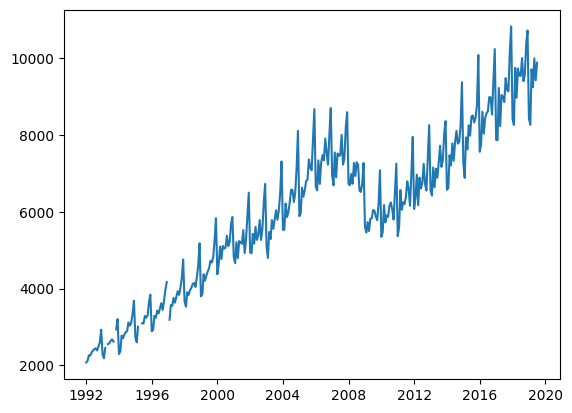

In [9]:
import matplotlib.pyplot as plt

datos_acciones = pd.read_csv("data/df_furniture.csv", parse_dates=["Month"], index_col=["Month"])

plt.plot(datos_acciones);

Parece que aunque hay una tendencia ascendente clara, hubo algún incidente en el 2007 al 2009, hasta que recuperó la dinámica anterior.

Muestra un ciclo regular, que parece de cadencia anual (periodo 12 meses).

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es estacionaria?

In [10]:
from statsmodels.tsa.stattools import adfuller

adfuller(datos_acciones['furniture_price_adjusted'].values)

(-1.1285507258736847,
 0.7035529748090023,
 14,
 316,
 {'1%': -3.4512146067362317,
  '5%': -2.870730188960711,
  '10%': -2.5716664849383113},
 4197.675275795754)

In [11]:
datos_acciones.iloc[:100, :].describe()

,furniture_price_adjusted
count,100.000000
mean,3428.266040
std,831.579977
min,2073.432724
25%,2724.801590
50%,3327.005867
75%,3987.282412
max,5836.208088


In [12]:
datos_acciones.iloc[100:150, :].describe()

,furniture_price_adjusted
count,50.000000
mean,5538.147025
std,549.516623
min,4664.693689
25%,5168.083744
50%,5453.139237
75%,5847.623760
max,7314.125882


In [13]:
datos_acciones.iloc[150:, :].describe()

,furniture_price_adjusted
count,181.000000
mean,7504.113372
std,1249.077289
min,5349.481724
25%,6571.369178
50%,7276.290021
75%,8329.342933
max,10833.501852


## 6. ¿Conoces algún método para representar mejor la tendencia?

In [14]:
datos_12m = datos_acciones['furniture_price_adjusted'].rolling(12).mean()
datos_6m = datos_acciones['furniture_price_adjusted'].rolling(6).mean()
datos_24m = datos_acciones['furniture_price_adjusted'].rolling(24).mean()

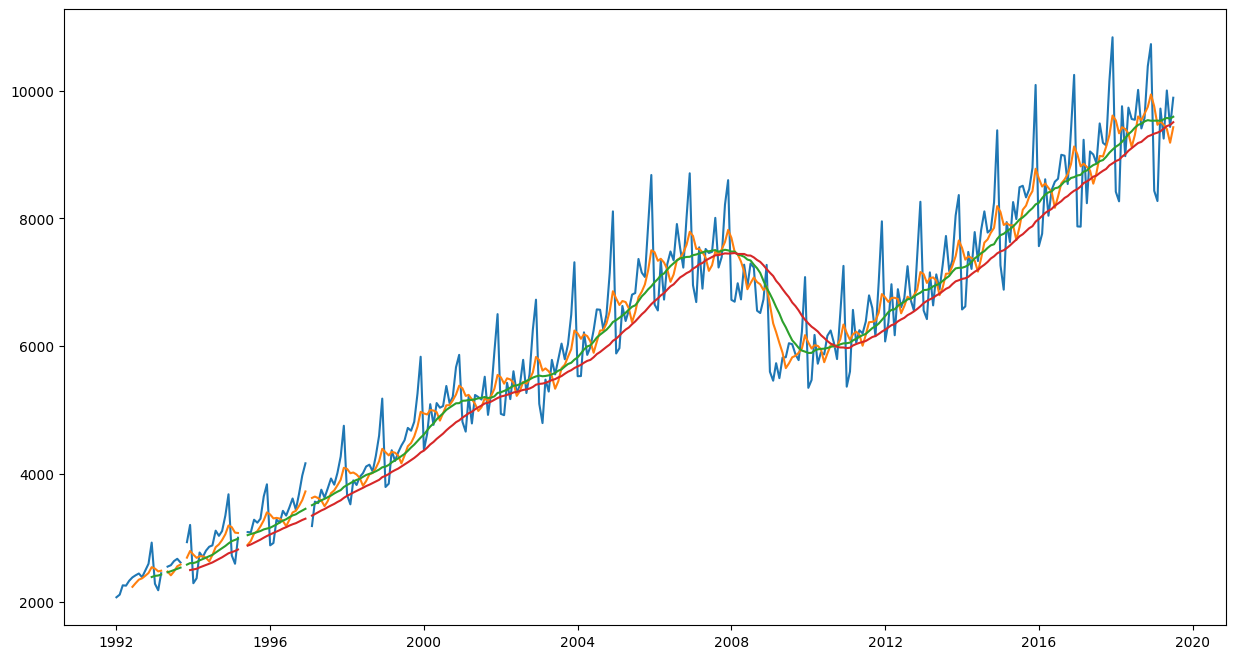

In [15]:
plt.figure(figsize=(15,8))
plt.plot(datos_acciones['furniture_price_adjusted'])
plt.plot(datos_6m)
plt.plot(datos_12m)
plt.plot(datos_24m)

In [16]:
datos_acciones.index = pd.date_range(datos_acciones.index.min(), datos_acciones.index.max(), freq='MS')

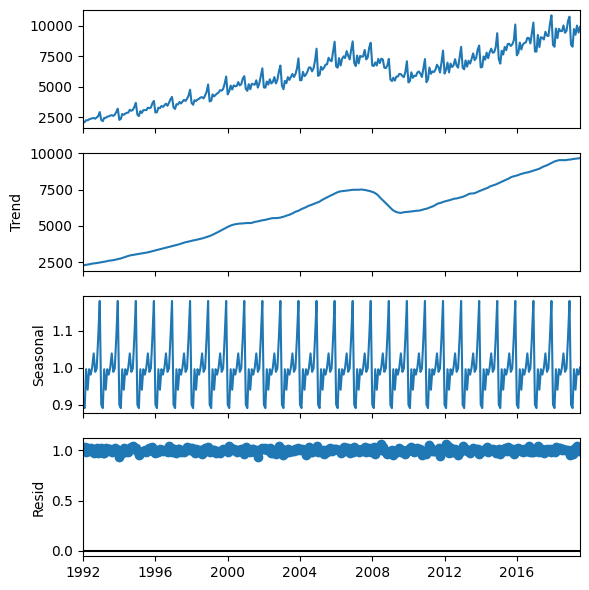

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
result_mul = seasonal_decompose(datos_acciones, model = 'multiplicative', extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_mul.plot();

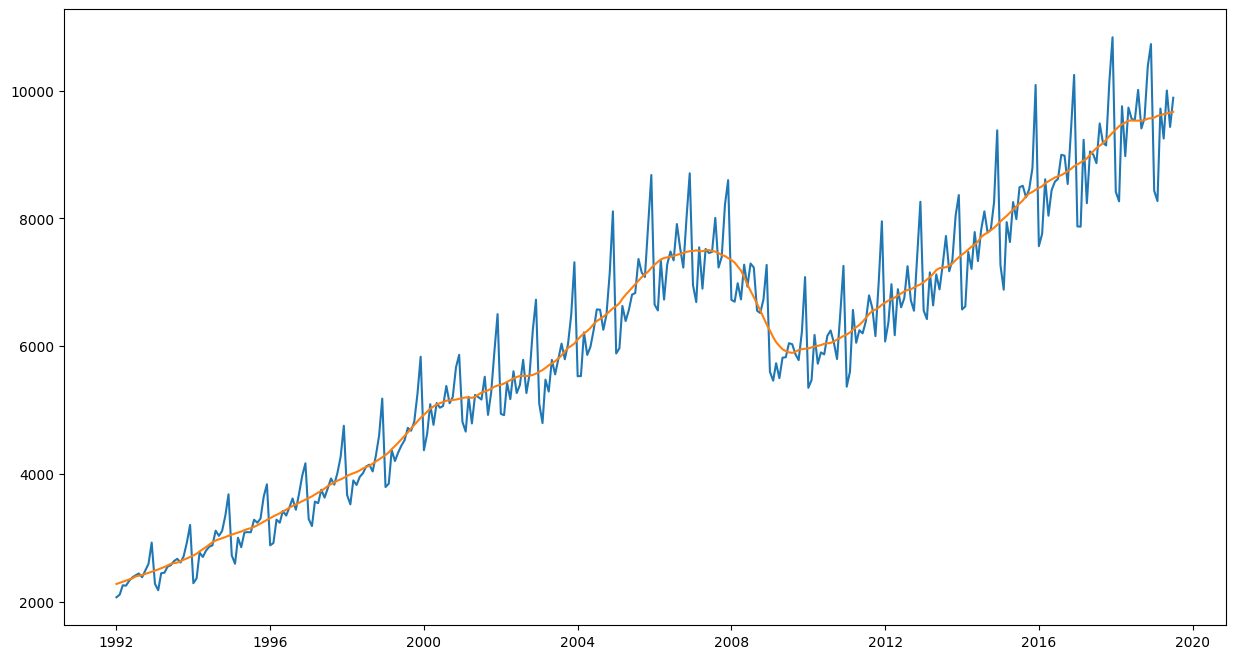

In [18]:
plt.figure(figsize=(15,8))
plt.plot(datos_acciones['furniture_price_adjusted'])
#plt.plot(datos_6m)
#plt.plot(datos_12m)
#plt.plot(datos_24m)
plt.plot(result_mul.trend)

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

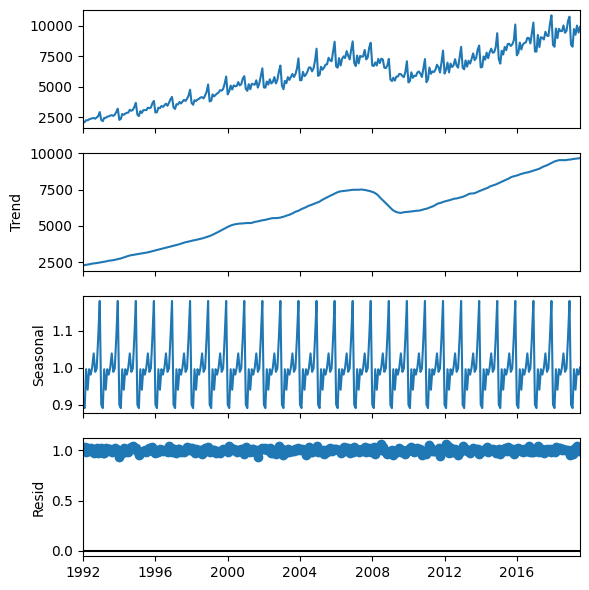

In [19]:
result_mul.plot();

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

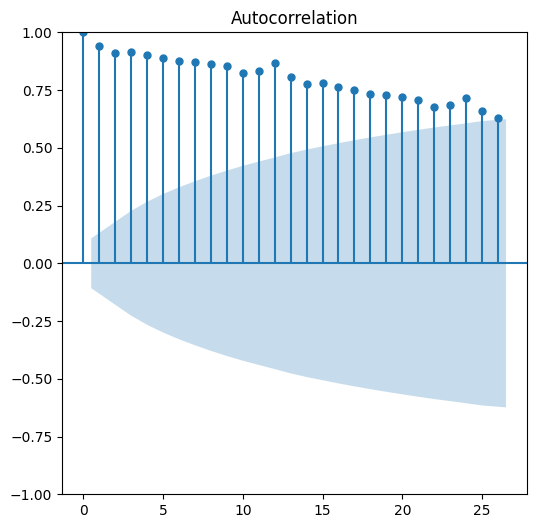

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(datos_acciones['furniture_price_adjusted']);

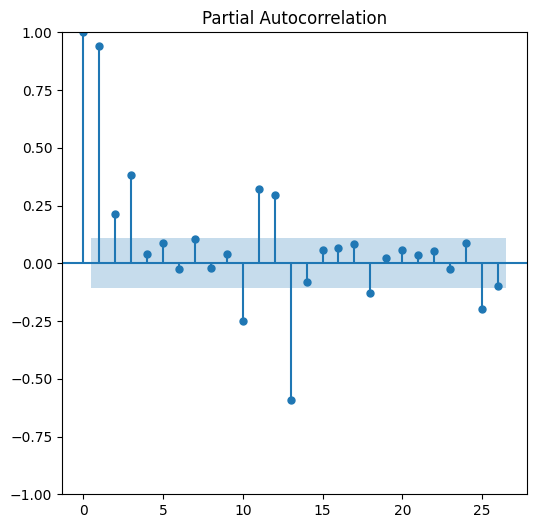

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(datos_acciones['furniture_price_adjusted']);

## 9. ¿Qué dependencia tiene cada instante de sus últimos 5 lags? Demuéstralo mediante una matriz de correlación.

In [22]:
datos_shift = datos_acciones.copy()

for i in range(10):
    datos_shift[f"lag{i+1}"] = datos_acciones.shift(i+1)

datos_shift

,furniture_price_adjusted,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10
1992-01-01,2073.432724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-02-01,2114.485812,2073.432724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-03-01,2260.570891,2114.485812,2073.432724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-01,2255.103236,2260.570891,2114.485812,2073.432724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-01,2331.414618,2255.103236,2260.570891,2114.485812,2073.432724,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-03-01,9718.107698,8271.237355,8431.965334,10726.595075,10380.194097,9569.037851,9407.297340,10010.598100,9542.663403,9554.807941,9733.086145
2019-04-01,9248.814254,9718.107698,8271.237355,8431.965334,10726.595075,10380.194097,9569.037851,9407.297340,10010.598100,9542.663403,9554.807941
2019-05-01,10001.305304,9248.814254,9718.107698,8271.237355,8431.965334,10726.595075,10380.194097,9569.037851,9407.297340,10010.598100,9542.663403
2019-06-01,9431.337229,10001.305304,9248.814254,9718.107698,8271.237355,8431.965334,10726.595075,10380.194097,9569.037851,9407.297340,10010.598100


In [23]:
datos_shift.corr()

,furniture_price_adjusted,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10
furniture_price_adjusted,1.000000,0.951005,0.928338,0.945035,0.940613,0.935901,0.929477,0.932748,0.935426,0.936360,0.913909
lag1,0.951005,1.000000,0.950599,0.927538,0.944637,0.939980,0.936260,0.929590,0.932144,0.934740,0.935677
lag2,0.928338,0.950599,1.000000,0.950224,0.926949,0.944155,0.940026,0.936139,0.929411,0.931786,0.934152
lag3,0.945035,0.927538,0.950224,1.000000,0.949927,0.926156,0.944735,0.940361,0.935446,0.928542,0.931046
lag4,0.940613,0.944637,0.926949,0.949927,1.000000,0.949554,0.926037,0.944604,0.940494,0.935271,0.927959
lag5,0.935901,0.939980,0.944155,0.926156,0.949554,1.000000,0.949937,0.926062,0.944243,0.939932,0.934587
lag6,0.929477,0.936260,0.940026,0.944735,0.926037,0.949937,1.000000,0.949729,0.927575,0.945493,0.940237
lag7,0.932748,0.929590,0.936139,0.940361,0.944604,0.926062,0.949729,1.000000,0.951172,0.928369,0.945649
lag8,0.935426,0.932144,0.929411,0.935446,0.940494,0.944243,0.927575,0.951172,1.000000,0.950407,0.927819
lag9,0.936360,0.934740,0.931786,0.928542,0.935271,0.939932,0.945493,0.928369,0.950407,1.000000,0.950000


<Axes: >

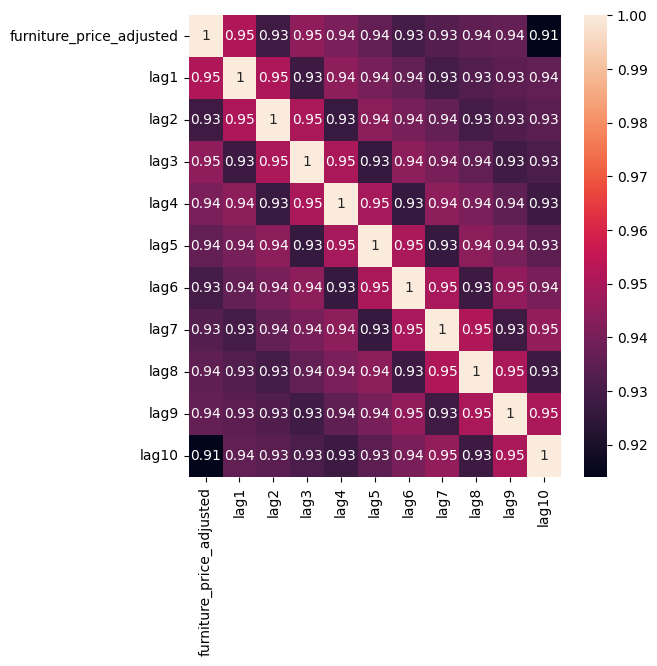

In [24]:
import seaborn as sns

sns.heatmap(datos_shift.corr(), annot=True)

## 10. Ya hemos visto que hay estacionalidad. ¿Cada cuántos instantes se cumple ese patrón?

Parece que doce mese sería un periodo lógico.

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

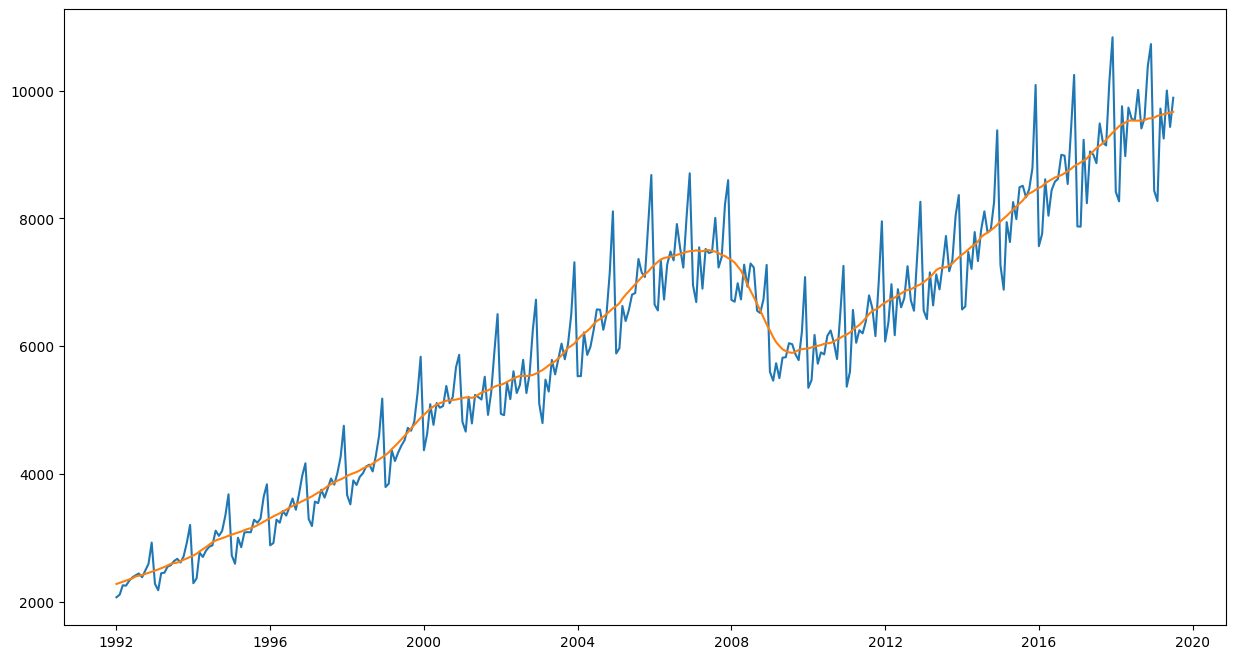

In [25]:
plt.figure(figsize=(15,8))
plt.plot(datos_acciones['furniture_price_adjusted'])
plt.plot(result_mul.trend)

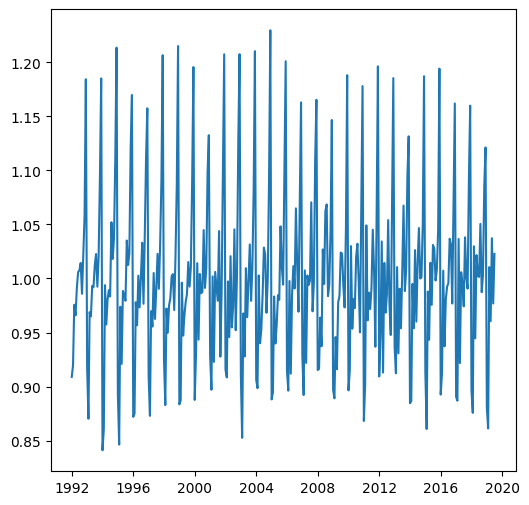

In [26]:
plt.plot(datos_acciones['furniture_price_adjusted'] / result_mul.trend)

In [27]:
adfuller(datos_acciones['furniture_price_adjusted'] / result_mul.trend)

(-5.819016970880919,
 4.2257417733603604e-07,
 17,
 313,
 {'1%': -3.4514162625887037,
  '5%': -2.8708187088091406,
  '10%': -2.5717136883095675},
 -1453.6170215692364)

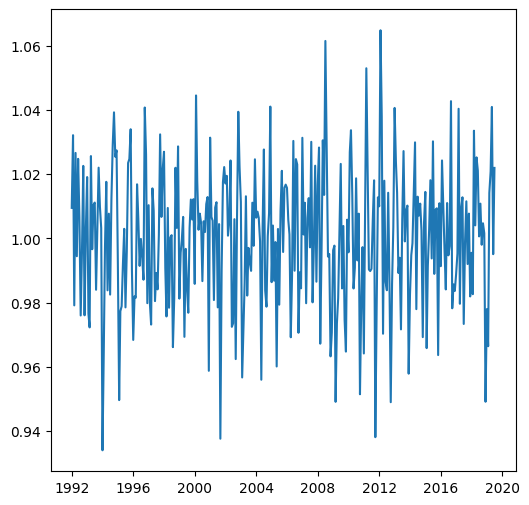

In [28]:
plt.plot(datos_acciones['furniture_price_adjusted'] / result_mul.trend / result_mul.seasonal)

In [80]:
from pmdarima.arima import auto_arima

smodel = auto_arima(datos_acciones,
                    start_p=1, max_p=3,
                    test='adf',
                    start_q=10, max_q=16,
                    m=12, seasonal=True,
                    start_P=0,
                    d=None, D=1, trace=True,
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,10)(0,1,1)[12]             : AIC=4218.129, Time=10.73 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4337.871, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4275.350, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4245.976, Time=0.22 sec
 ARIMA(1,1,10)(0,1,0)[12]             : AIC=4231.040, Time=1.96 sec
 ARIMA(1,1,10)(1,1,1)[12]             : AIC=4211.350, Time=14.15 sec
 ARIMA(1,1,10)(1,1,0)[12]             : AIC=4224.706, Time=2.72 sec
 ARIMA(1,1,10)(2,1,1)[12]             : AIC=4213.055, Time=15.56 sec
 ARIMA(1,1,10)(1,1,2)[12]             : AIC=4215.500, Time=25.23 sec
 ARIMA(1,1,10)(0,1,2)[12]             : AIC=4208.629, Time=11.90 sec
 ARIMA(0,1,10)(0,1,2)[12]             : AIC=4207.900, Time=9.81 sec
 ARIMA(0,1,10)(0,1,1)[12]             : AIC=4218.320, Time=6.35 sec
 ARIMA(0,1,10)(1,1,2)[12]             : AIC=4209.386, Time=13.19 sec
 ARIMA(0,1,10)(1,1,1)[12]             : AIC=4209.254, Time=10.89 sec
 

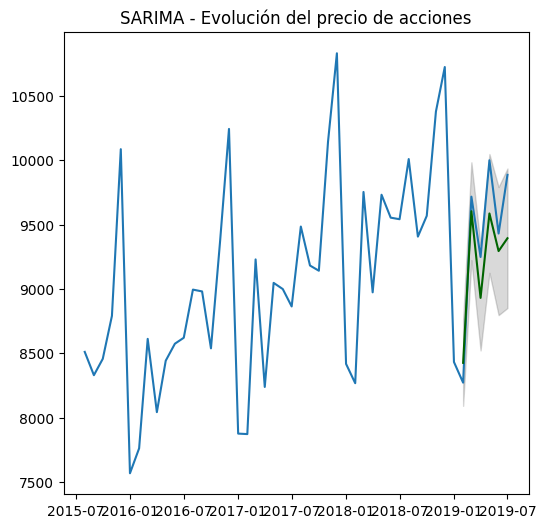

In [48]:
from pmdarima.arima import ARIMA

# Forecast
n_periods = 6

smodel = ARIMA(order=(0,1,10), seasonal_order=(0,1,2,12))
smodel.fit(datos_acciones[:-n_periods])

fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(datos_acciones.index[-n_periods], periods = n_periods, freq='MS')

fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(datos_acciones[-48:])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Evolución del precio de acciones")
plt.show()

In [54]:
np.mean(abs(fitted - df["y"][-prediction_size:].values))

271.52466872082005

In [29]:
# !pip install numpy==1.26.4

In [32]:
df = datos_acciones.reset_index()

df.columns = ['ds', 'y']
df.tail(n=3)

,ds,y
328,2019-05-01,10001.305304
329,2019-06-01,9431.337229
330,2019-07-01,9887.800688


In [33]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [34]:
prediction_size = 6
train_df = df[:-prediction_size]
train_df.tail(n=3)

,ds,y
322,2018-11-01,10380.194097
323,2018-12-01,10726.595075
324,2019-01-01,8431.965334


In [35]:
from prophet import Prophet

m = Prophet()
m.fit(train_df);

/home/iraitz/TheBridge/FEB24 -BIL  DS PT/TheBridge_DSPT_ML/.venv311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


20:42:10 - cmdstanpy - INFO - Chain [1] start processing
20:42:10 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
future = m.make_future_dataframe(periods=prediction_size, freq='MS')
future.tail(n=3)

,ds
328,2019-05-01
329,2019-06-01
330,2019-07-01


In [37]:
forecast = m.predict(future)
forecast.tail(n=3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
328,2019-05-01,9924.114797,9615.647710,10176.232928,9921.348416,9926.435379,-13.249847,-13.249847,-13.249847,-13.249847,-13.249847,-13.249847,0.0,0.0,0.0,9910.864949
329,2019-06-01,9962.323155,9541.523737,10116.148428,9956.671296,9969.228297,-124.828266,-124.828266,-124.828266,-124.828266,-124.828266,-124.828266,0.0,0.0,0.0,9837.494889
330,2019-07-01,9999.298986,9677.607450,10257.016380,9988.819938,10010.910372,-16.717207,-16.717207,-16.717207,-16.717207,-16.717207,-16.717207,0.0,0.0,0.0,9982.581780


/home/iraitz/TheBridge/FEB24 -BIL  DS PT/TheBridge_DSPT_ML/.venv311/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/iraitz/TheBridge/FEB24 -BIL  DS PT/TheBridge_DSPT_ML/.venv311/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


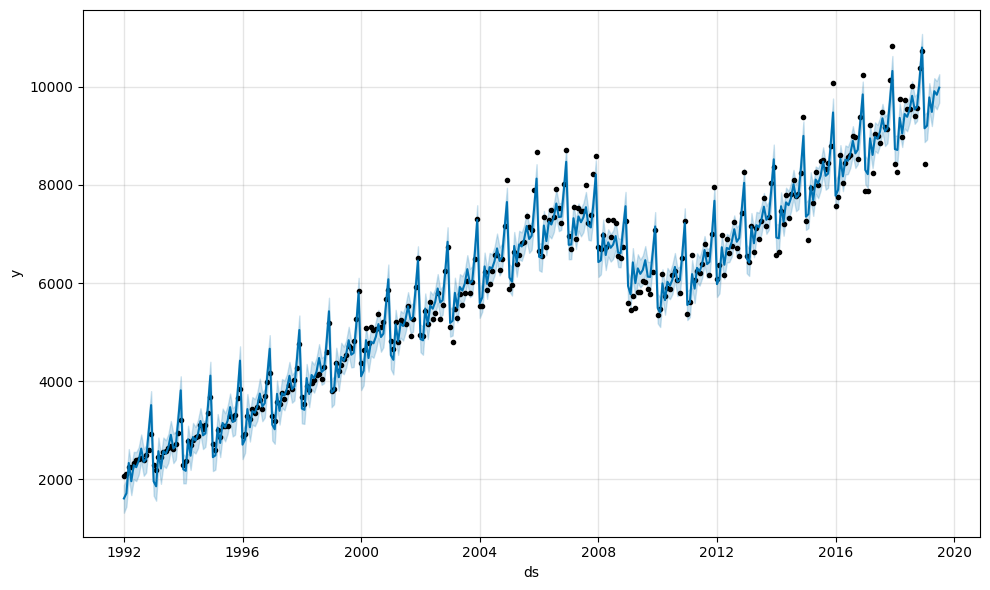

In [38]:
m.plot(forecast);

In [46]:
np.mean(abs(forecast['yhat'][-6:] - df["y"][-prediction_size:]))

305.37010882201565